In [ ]:
# @title Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Load the dataset
data = pd.read_csv ("/content/Iris.csv")

In [ ]:
# Split features and target variable
X = data.drop(columns=["Id", "Species"])  # Features
y = data["Species"]  # Target variable

In [ ]:
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# @title Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# @title Define the classifier
clf = DecisionTreeClassifier(random_state=42)

In [ ]:
# Define hyperparameters to search
param_grid = {'max_depth': [2, 3, 4, 5]}

In [ ]:
# Perform grid search to find the best parameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5]})

In [ ]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_

In [ ]:
# Train the model with the best parameters
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = best_clf.predict(X_test)

In [ ]:
# @title Calculate accuracy after fine-tuning
# Calculate accuracy after fine-tuning
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after fine-tuning:", accuracy)

Accuracy after fine-tuning: 1.0


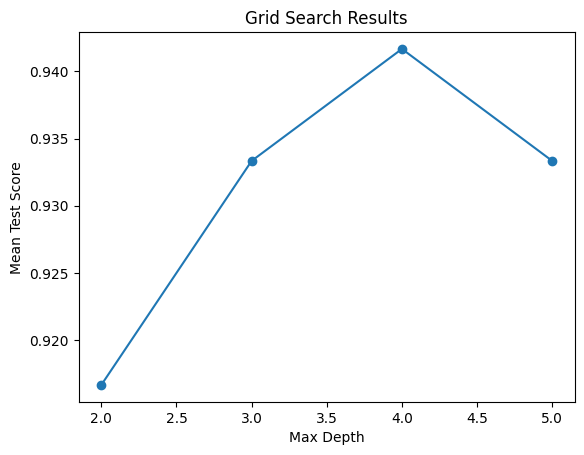

In [ ]:
# Plot the grid search results
scores = grid_search.cv_results_['mean_test_score']
plt.figure()
plt.plot(param_grid['max_depth'], scores, marker='o')
plt.title('Grid Search Results')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()